***
# Simulate targets for a specific sky area (and get expected rates)

Sometime, you do not want to simulate target for the entire sky but only for a specific part of the sky. We call that a **skyarea**. This **skyarea** is supposed to be a `shapely.(Multi)Polygon` and can be directly provided in the `draw()` (or `from_draw()`) method of a transient. As such, it will be passed to any fucntion that have skyarea as their parameters. This is notably the case of `skysurvey.tools.random_radec()` that is communly used to get the simulated target coordinates.

This is particularly useful when dealing with deep-field surveys that only observe specific fields in the sky.

## Load a mock GridSurvey having 5 deep-fields

In [47]:
import skysurvey
from skysurvey import examples

In [48]:
survey = examples.get_mock_gridsurvey()

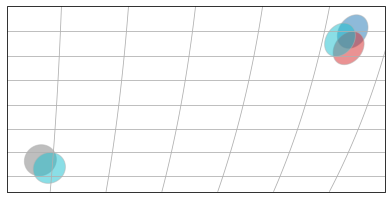

In [49]:
fig = survey.show(autoscale=True)

### `.get_skyarea()`

`GridSurvey`s have a `get_skyarea()` method that returns a (Multi)Polygon corresponding to each of its observing field. This is a shapely.geometry

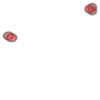

In [50]:
skyarea = survey.get_skyarea()
skyarea

### `.get_timerange()` 
Survey also have a `.get_timerange()` method that provide the fist and last observation. 

In [52]:
tstart, tstop = survey.get_timerange()

## `.from_draw(skyarea=, tstart=, tstop= )`

Hence, you can simply load a transient using these three keywords

In [57]:
targets = skysurvey.SNeIa.from_draw(tstart=tstart, tstop=tstop,
                                    skyarea=skyarea, 
                                    zmax=1)

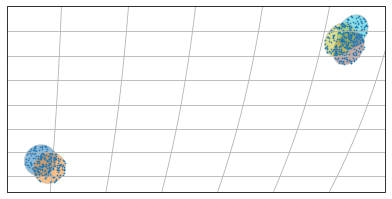

In [54]:
from cartopy import crs
origin = 180
fig = survey.show(autoscale=True, origin=origin)
# Show overlapping targets, we use the crs.PlateCarree() for the non-healpy survey.show()
ax = fig.axes[0]
ax.scatter(targets.data["ra"].values-origin, targets.data["dec"].values, 
          transform=crs.PlateCarree(), # Important !
          alpha=0.9, s=3, lw=0)

### `skyarea.buffer()`

Since skyarea is a shapely.(Multi)Polygon, it has a buffer method, if you want to simulate targets around the fields. 

Let's say we want to simulates 2 degrees around the fields and not just overlapping the fields.

simply do:

In [59]:
targets = skysurvey.SNeIa.from_draw(tstart=tstart, tstop=tstop,
                                    skyarea=skyarea.buffer(2), 
                                    zmax=1)

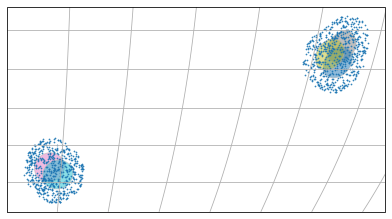

In [60]:
from cartopy import crs
origin = 180
fig = survey.show(autoscale=True, origin=origin)
# Show overlapping targets, we use the crs.PlateCarree() for the non-healpy survey.show()
ax = fig.axes[0]
ax.scatter(targets.data["ra"].values-origin, targets.data["dec"].values, 
          transform=crs.PlateCarree(), # Important !
          alpha=0.9, s=3, lw=0)

### no size provided, how come ?

Transients, like SNeIa have a pre-defined rate (see `targets.rate`), hence, given *tstart* and *tstop*, the `draw()` method derives `nyears`. Then, given the inputs `skyarea` and `zmax`, it computes `size`. 

**tip**: you can combined tstop + nyears (-> tstart) | tstart + nyears (->tstop). If you provide both nyears and size, nyears will be ignored for the size computation.

**tip**: using `skyarea` and `nyears`, you can 

In [61]:
targets.rate # volumetric rate, in Gyr^3/year

23500.0

## Using `skyarea` and `nyears` to get a quick look at how many targets should exist

you can combine `skyarea` and `nyears` to have a quick look at how many targets are supposed to be created by nature up to a given redshift (or redshift shell).

Say you want to know how many targets nature should create, in 3 years, for a 9deg^2 fields between $z\in[0.3,0.6]$

9.0


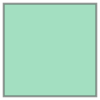

In [65]:
from shapely import geometry
skyarea = geometry.box(0, 0, 3, 3)
print(skyarea.area)
skyarea

In [67]:
snia= skysurvey.SNeIa.from_draw(nyears=3, skyarea=skyarea, zmin=0.3, zmax=0.6)
len(snia.data)

635

So: 635 SNeIa !